In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [3]:
boston = load_boston()

In [8]:
bostonDF = pd.DataFrame(data=boston.data, columns=boston.feature_names)
bostonDF["PRICE"] = boston.target

In [9]:
print(bostonDF.shape)

bostonDF.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


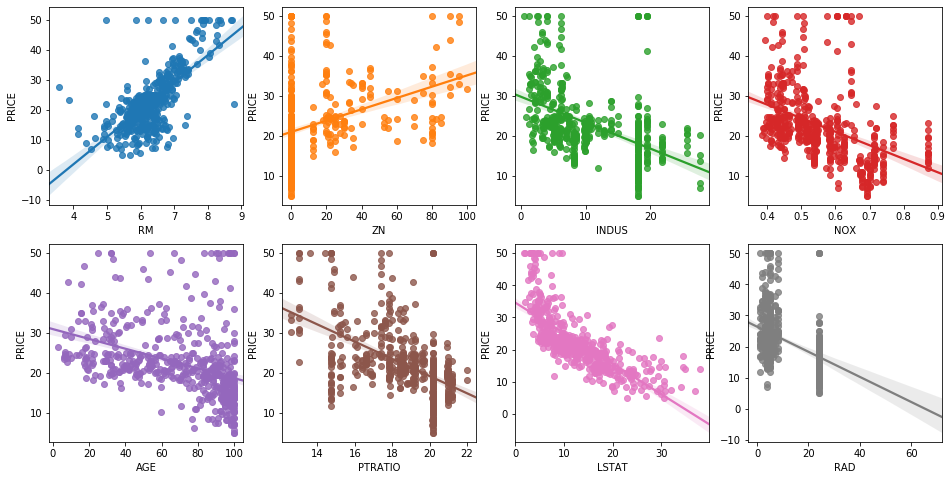

In [11]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ["RM", "ZN", "INDUS", "NOX", "AGE", "PTRATIO", "LSTAT", "RAD"]
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y="PRICE", data=bostonDF, ax=axs[row][col])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
y=bostonDF["PRICE"]
x = bostonDF.drop(columns=["PRICE"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=156)

In [16]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_preds = lr.predict(x_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

print("MSE: {0: .3f}, RMSE: {1: .3f}".format(mse, rmse))
print("Variance score: {0: .3f}".format(r2))

MSE:  17.297, RMSE:  4.159
Variance score:  0.757


In [27]:
print("절편: ", lr.intercept_)
print("회귀 계수", np.round(lr.coef_, 1))

절편:  40.995595172164755
회귀 계수 [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [30]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=x.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [32]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(" ")